# Larry Gu

## Research question/interests

I have heard of the term dewpoint but I never really know what that is. To get a better understanding of dewpoint, I would like to investigate on the the average value of it in this dataset. Specifically, I want to find out how dewpoint changes over time, and what are the most relevent factors to the dewpoint.

# Milestone 3

## EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions1 as pf1

In [ ]:
path = '../data/raw/climate_data.csv'
df = pd.read_csv(path)

In [ ]:
print(df.shape)
df.head()

(3902, 23)


,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


I notice that Date1 is purely redundant. I will remove this in the future. As columns in this dataframe have very long names, and many of them have spaces in between. It may cause trouble in EDA. So, I will update the column names data before I proceed.

In [ ]:
df_new = pf1.update_column(path)
df_new.head()

,Date,avg_tem,avg_hum,avg_dew,avg_bar,avg_win,avg_gus,avg_dir,rfm,rfy,...,max_hum,min_hum,max_pre,min_pre,max_win,max_gus,max_hea,Date1,Month,dif_p
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


Much better! I will now look at dewpoints only. See how it variates between different months.

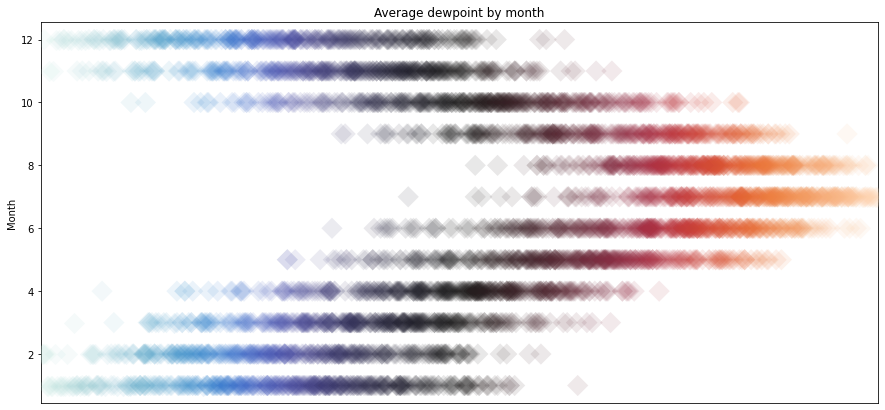

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.stripplot(
    data=df_new[['avg_dew','Month']], x="avg_dew", y="Month",
    jitter=False, s=15, marker="D", alpha=.1, palette="icefire"
)
ax.set(xticklabels=[],title='Average dewpoint by month',xlabel=None)  
ax.tick_params(bottom=False)  # remove the ticks
plt.show()

Note that this data is from Estes Park, Colorado. I can see that dewpoints are higher in summer (June to August) and lower in winter (December to Feburary). I would like to investigate on how these value changes over different years. But now I will start investigating on factors that are related to average dewpoints.

In [ ]:
describe_df = df_new.describe().T.sort_values(by=['std'])[['mean','std','min','max']]
print(describe_df)

               mean        std     min      max
max_rai    0.000000   0.000000   0.000    0.000
avg_bar   29.881420   0.250395  28.200   31.000
max_pre   30.045451   0.258140  29.338   31.204
dif_p      0.343829   0.407499   0.000   16.602
min_pre   29.701622   0.451691  13.266   30.855
rfm        0.451105   0.603462   0.000    4.480
Month      6.395695   3.430231   1.000   12.000
avg_win    5.758893   4.022485   0.000   26.400
rfy        5.486171   4.534444   0.000   16.410
max_win   19.840748  12.235410   0.000  181.700
avg_gus   10.011968  14.117446   0.000  240.400
min_tem   31.227524  14.124424 -27.700   65.700
avg_dew   23.127037  14.634088 -22.200   55.100
avg_tem   44.670733  15.326793 -12.100   76.300
min_hum   26.016914  15.623870   0.000   90.000
avg_hum   48.878011  17.438153   9.000   94.000
max_tem   57.561661  17.755874  -6.100   92.700
max_hea   58.086315  17.953453  -6.100   88.400
max_hum   73.673757  20.380611   1.000  100.000
max_gus   33.974910  38.632424   0.000  

I can see that the std of columns regarding gustspeed, humidity, and temperature are very close to average dewpoint. 
That suggests they may have similar levels of flucuations.
I want further investigate on their relationship to avgerage dewpoint.

Also maximum rain per minute is always 0, so for the future invesigation regarding this dataset, I will probably leave the rain data out in future data analysis.

<AxesSubplot:ylabel='Density'>

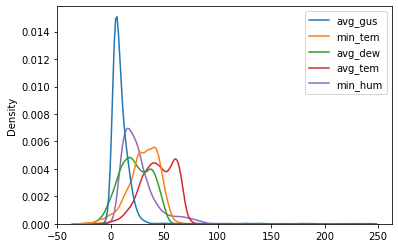

In [ ]:
# sns.displot(data=df_new, x="avg_dew")
sns.kdeplot(data=df_new[["avg_gus","min_tem","avg_dew","avg_tem","min_hum"]])

From the five features that have std closet to average dewpoint. It is hard to say that average gustspeed is relatable to average dewpoint. I will focus on humidity and temperature from now on.

Let's give average temperature a closer look first.

<AxesSubplot:xlabel='avg_dew', ylabel='avg_tem'>

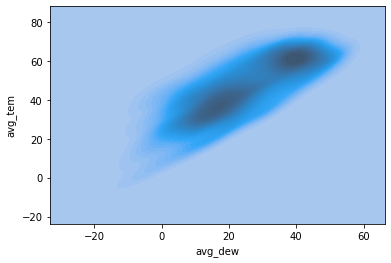

In [ ]:
sns.kdeplot(data=df_new, x="avg_dew", y="avg_tem",fill=True,thresh=0, levels=50, )

Now lets give average humidity a try.

<AxesSubplot:xlabel='avg_dew', ylabel='avg_hum'>

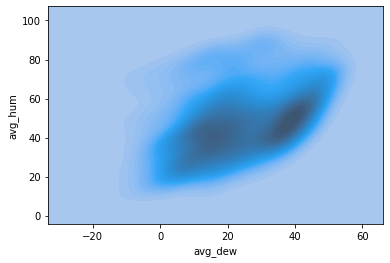

In [ ]:
sns.kdeplot(data=df_new, x="avg_dew", y="avg_hum",fill=True,thresh=0, levels=50, )

The shape of both graphs are rather rounded and close to the center of the graphs.
Suggesting that the all three distributions are close to normal distribution.
It is interesting though, that there are two cluters on both graph (where the color of the area is darkest).
It might suggest that during winter and summer, the values are relatively close to each other. But during intermediate periods, they both changes in the same direction.